# Prediction of Movie genres from Movie description of US feature films from 2018 to 2021 Using Machine Learning
จัดทำโดย นายพิชญ์พงศ์ พูลผล 63199130346 รายวิชา DS532 Text Analytic ปีการศึกษา 2564

# Import Library

In [490]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

%matplotlib inline

# Web Scraping

เนื่องจาก Url หลังคำว่า start สามารถใส่ตัวเลขได้ไม่เกิน 10,000 เรื่อง ถ้าเกิน 10,000 เรื่อง จะเป็น encoded number เลยเลือกทำ Webscraping แยกทีละปี ตั้งแต่ปี 2018 - 2021
และเลือกเฉพาะหนังจาก US ที่เป็น Title type ชนิด Feature Film

<img src = "./img/01_10000.png">

Title Type แบบ Feature Film
<img src = "./img/Feature_film.png">

Countries เลือกเป็น United States
<img src = "./img/united_state.png">

# Year 2018
ให้ Scrape แต่ละ หน้า เป็น dataframe แล้วเก็บ datframe ไว้ใน list ชื่อว่า movie
มีข้อกำหนดคือ จะไม่เลือกหนังที่ ไม่มี genre หรือ ไม่มี description ในที่นี้ถ้าไม่มี description จะมีคำว่า "Add a Plot"

- กำนหด url หน้าละ 250 เรื่อง
- เลือกเฉพาะข้อมูล ชื่อหนัง ปี genre และ description
- ปี 2018 มีหนังทั้งสิ้น 3,931 เรื่อง

<img src = "./img/2018.png">

In [491]:
movie = []

#2018
for i in range(1,3931,250):
    url = "https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&countries=us&count=250&start="+str(i)
    response = requests.get(url)
    #print(response.text[:500])
    html_soup = BeautifulSoup(response.text, 'html.parser')
    #type(html_soup)
    movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
    names = []
    years = []
    genres = []
    descriptions = []

    for container in movie_containers:
        #เลือกเฉพาะเรื่องที่ Genres ไม่เป็น Null และเรื่องที่ไม่ใช่คำว่า Add a Plot (แปลว่าไม่มี description)
        if (container.find('span', attrs = {'class': 'genre'}) is not None)&\
            ((container.find_all('p', attrs={'class':'text-muted'})[-1].text)!='\nAdd a Plot\n'):

            # The name
            name = container.h3.a.text
            names.append(name)

            # The year
            year = container.h3.find('span', class_ = 'lister-item-year').text
            years.append(year)

            # The genres
            genre = container.find('span', attrs = {'class': 'genre'}).text
            genres.append(genre)

            # The descriptions
            description = container.find_all('p', attrs={'class':'text-muted'})[-1].text
            descriptions.append(description)
            
    test_df = pd.DataFrame({'movie': names,
                     'year': years,
                     'genres': genres,
                     'descriptions': descriptions})
    movie.append(test_df)

ได้ข้อมูลหนังมาทั้งหมด 16 หน้า (เป็น 16 dataframe)

In [492]:
len(movie)

16

In [493]:
#ข้อมูลหน้าสุดท้าย
movie[15]

movie    year  \
0                         Apathize Me  (2018)   
1                     Defying the 6Th  (2018)   
2            Thru the Course of a Day  (2018)   
3                             Stunted  (2018)   
4                     CHIC: Part Deux  (2018)   
..                                ...     ...   
92  M.I.C.K (Malice In Chaos Kitchen)  (2018)   
93          Welcome Back, Mister Cujo  (2018)   
94                     The Karma Club  (2018)   
95                               Arun  (2018)   
96                              Coin$  (2018)   

                                     genres  \
0              \nDrama, Romance               
1    \nDrama, Mystery, Thriller               
2                       \nDrama               
3                      \nComedy               
4   \nAdventure, Comedy, Family               
..                                      ...   
92                      \nCrime               
93          \nAnimation, Comedy               
94       \nCrime, Drama, Family               
95                      \nDrama               
96                      \nCrime               

                                         descriptions  
0   \nA boy is cursed from birth in which, any tim...  
1   \n"In a world where life and death are slowly ...  
2   \nA group of high school friends face the ever...  
3   \nA young stunt enthusiast, Gavin Gorski, sets...  
4   \nThree years after the first trip, Kaleb and ...  
..                                                ...  
92  \nMeet the Salomon Family. Micky and Jason, "B...  
93  \nAfter the dumpster fire that was his first t...  
94  \nThe Karma Club is about three orphaned broth...  
95  \nTwo adolescent Thai boys journey to Bangkok ...  
96  \nThree construction workers find $8 million i...  

[97 rows x 4 columns]

# Year 2019
- มีหนังทั้งสิ้น 3425 เรื่อง

<img src = './img/2019.png'>

In [494]:
#2019
for i in range(1,3425,250):
    url = "https://www.imdb.com/search/title/?title_type=feature&release_date=2019-01-01,2019-12-31&countries=us&count=250&start="+str(i)
    response = requests.get(url)
    #print(response.text[:500])
    html_soup = BeautifulSoup(response.text, 'html.parser')
    #type(html_soup)
    movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
    names = []
    years = []
    genres = []
    descriptions = []

    for container in movie_containers:
    
        if (container.find('span', attrs = {'class': 'genre'}) is not None)&\
            ((container.find_all('p', attrs={'class':'text-muted'})[-1].text)!='\nAdd a Plot\n'):

            # The name
            name = container.h3.a.text
            names.append(name)

            # The year
            year = container.h3.find('span', class_ = 'lister-item-year').text
            years.append(year)

            # The genres
            genre = container.find('span', attrs = {'class': 'genre'}).text
            genres.append(genre)

            # The descriptions
            description = container.find_all('p', attrs={'class':'text-muted'})[-1].text
            descriptions.append(description)
            
    test_df = pd.DataFrame({'movie': names,
                     'year': years,
                     'genres': genres,
                     'descriptions': descriptions})
    movie.append(test_df)

ได้ข้อมูลหนังมาทั้งหมด 14 หน้า (รวมของเดิม 16 หน้า) เป็น 30 หน้า

In [495]:
len(movie)

30

In [496]:
movie[29]

movie    year  \
0                    Grave Crooper: The Movie  (2019)   
1                                 Death River  (2019)   
2                              Livin' Michael  (2019)   
3   Mediterra by Allstars U.S.A Entertainment  (2019)   
4                               Gordon Finn 2  (2019)   
..                                        ...     ...   
76                         Little Bookworms 3  (2019)   
77                     Hope & Mike's Open Mic  (2019)   
78          From The Barrio to The Board Room  (2019)   
79                    Please Don't Let Me Die  (2019)   
80                     All My Life (Afro Pop)  (2019)   

                                    genres  \
0                     \nComedy               
1                     \nHorror               
2                      \nDrama               
3   \nFamily, Fantasy, Musical               
4    \nCrime, Horror, Thriller               
..                                     ...   
76                 \nAnimation               
77                    \nComedy               
78                     \nDrama               
79                    \nComedy               
80                     \nMusic               

                                         descriptions  
0   \nMultiple hours after the events of Season Th...  
1   \nA trio of dumb teenagers are stalked and mur...  
2   \nMichael is a 15 year old high school student...  
3   \nA tourist couple visiting a Mediterranean mu...  
4   \nGordon Finn is a fugitive on the run. Author...  
..                                                ...  
76  \nWith so many critters in the pond, how will ...  
77  \nWhat is serendipity? When a Kansas City tele...  
78  \nA kid from the barrio overcomes seemingly im...  
79  \nA Mexican thief robs a food store in the wil...  
80  \nKadda Sheekoff's backstory is intriguing. Ha...  

[81 rows x 4 columns]

# Year 2020
- มีหนังทั้งสิ้น 3,616 เรื่อง

<img src = './img/2020.png'>

In [497]:
#2020
for i in range(1,3616,250):
    url = "https://www.imdb.com/search/title/?title_type=feature&release_date=2020-01-01,2020-12-31&countries=us&count=250&start="+str(i)
    response = requests.get(url)
    #print(response.text[:500])
    html_soup = BeautifulSoup(response.text, 'html.parser')
    #type(html_soup)
    movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
    names = []
    years = []
    genres = []
    descriptions = []

    for container in movie_containers:
    
        if (container.find('span', attrs = {'class': 'genre'}) is not None)&\
            ((container.find_all('p', attrs={'class':'text-muted'})[-1].text)!='\nAdd a Plot\n'):

            # The name
            name = container.h3.a.text
            names.append(name)

            # The year
            year = container.h3.find('span', class_ = 'lister-item-year').text
            years.append(year)

            # The genres
            genre = container.find('span', attrs = {'class': 'genre'}).text
            genres.append(genre)

            # The descriptions
            description = container.find_all('p', attrs={'class':'text-muted'})[-1].text
            descriptions.append(description)
            
    test_df = pd.DataFrame({'movie': names,
                     'year': years,
                     'genres': genres,
                     'descriptions': descriptions})
    movie.append(test_df)

ได้ข้อมูลหนังทั้งหมด 15 หน้า (รวมของเดิม 30 หน้า) เป็น 45 หน้า

In [498]:
len(movie)

45

In [499]:
movie[44]

movie    year  \
0         The House of Buddy's the Buddy Cut  (2020)   
1                           The Way of Twain  (2020)   
2                   My Father the Film Maker  (2020)   
3                          Misfortune Cookie  (2020)   
4                               Weed Whacker  (2020)   
..                                       ...     ...   
57                          Smokes and Jokes  (2020)   
58  The Challenge of Flight - Out of Control  (2020)   
59                                   Garbage  (2020)   
60                                Devil Pups  (2020)   
61                        Dying for a Coffee  (2020)   

                                  genres  \
0                   \nComedy               
1   \nComedy, Drama, History               
2                   \nComedy               
3                   \nComedy               
4                   \nComedy               
..                                   ...   
57                  \nComedy               
58                     \nWar               
59                  \nComedy               
60          \nAction, Family               
61                  \nComedy               

                                         descriptions  
0   \nAfter being kicked out of Hunter's place in ...  
1   \nWhat was stand-up comedy like at the turn of...  
2   \nA man in his fifties wants to take his estra...  
3   \nFour friends go to a Chinese restaurant, one...  
4   \nA power-hungry sociopath with godlike abilit...  
..                                                ...  
57  \nSmokes And Jokes The Movie. Smoking cigars a...  
58  \nWatch accident footage from actual mishaps, ...  
59  \nAfter losing his job in a freak "being late ...  
60  \nA Marine Force Recon Captain takes his four ...  
61  \nTwo hit-men stop for coffee at a rest stop a...  

[62 rows x 4 columns]

# Year 2021
- มีหนังทั้งสิ้น 4,211 เรื่อง ณ วันที่ 6 ตุลาคม 2564 เวลา 09:50 น.

<img src = './img/2021.png'>

In [500]:
#2021
for i in range(1,4211,250):
    url = "https://www.imdb.com/search/title/?title_type=feature&release_date=2021-01-01,2021-12-31&countries=us&count=250&start="+str(i)
    response = requests.get(url)
    #print(response.text[:500])
    html_soup = BeautifulSoup(response.text, 'html.parser')
    #type(html_soup)
    movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
    names = []
    years = []
    genres = []
    descriptions = []

    for container in movie_containers:
    
        if (container.find('span', attrs = {'class': 'genre'}) is not None)&\
            ((container.find_all('p', attrs={'class':'text-muted'})[-1].text)!='\nAdd a Plot\n'):

            # The name
            name = container.h3.a.text
            names.append(name)

            # The year
            year = container.h3.find('span', class_ = 'lister-item-year').text
            years.append(year)

            # The genres
            genre = container.find('span', attrs = {'class': 'genre'}).text
            genres.append(genre)

            # The descriptions
            description = container.find_all('p', attrs={'class':'text-muted'})[-1].text
            descriptions.append(description)
            
    test_df = pd.DataFrame({'movie': names,
                     'year': years,
                     'genres': genres,
                     'descriptions': descriptions})
    movie.append(test_df)

ได้ข้อมูลทั้งหมด 17 หน้า (รวมของเดิม 45 หน้า) เป็น 62 หน้า

In [501]:
len(movie)

62

In [502]:
movie[61]

movie    year  \
0   The Spectacular Spider-Man Trilogy (Responsibi...  (2021)   
1                                             Invoked  (2021)   
2                                           Nite Owls  (2021)   
3                               Under the Baghdad Sky  (2021)   
4                                            The EASY  (2021)   
..                                                ...     ...   
95                                      Pavement Tune  (2021)   
96                        Zack: Enfrentamiento Mortal  (2021)   
97                                          Montauk77  (2021)   
98                                  Last Warning Shot  (2021)   
99          Mysterious Creatures with Forrest Galante  (2021)   

                                  genres  \
0                    \nDrama               
1                   \nHorror               
2   \nCrime, Drama, Thriller               
3                    \nDrama               
4                   \nComedy               
..                                   ...   
95                   \nDrama               
96                  \nAction               
97                   \nDrama               
98                   \nDrama               
99               \nAdventure               

                                         descriptions  
0   \nYoung bullied Peter Parker is gifted great p...  
1   \nA young man films himself and his family as ...  
2   \nA disparate group of Pacific Northwestern te...  
3   \nWhen a washed out reporter goes to Baghdad t...  
4   \nA day in the life of writer/waiter Amanda Bu...  
..                                                ...  
95  \nPavement Tune is a coming of middle age stor...  
96  \nZack wanders through an unknown place. His o...  
97  \nAfter a down-on-his-luck ride-share driver r...  
98  \nWhen Maddy, an unsuspecting teenage girl mee...  
99  \nFollows Forrest along with his wife as they ...  

[100 rows x 4 columns]

ทำการ concatenate dataframe ทั้งหมดที่เก็บไว้ใน list ชื่อ movie

In [503]:
df_movie = pd.concat(movie)

ได้จำนวนภาพยนตร์ทั้งหมด 12,412 เรื่อง

In [504]:
df_movie.shape

(12412, 4)

Reset index ของ Dataframe

In [505]:
df_movie = df_movie.reset_index(drop=True)

In [506]:
df_movie.tail()

movie    year  \
12407                              Pavement Tune  (2021)   
12408                Zack: Enfrentamiento Mortal  (2021)   
12409                                  Montauk77  (2021)   
12410                          Last Warning Shot  (2021)   
12411  Mysterious Creatures with Forrest Galante  (2021)   

                        genres  \
12407      \nDrama               
12408     \nAction               
12409      \nDrama               
12410      \nDrama               
12411  \nAdventure               

                                            descriptions  
12407  \nPavement Tune is a coming of middle age stor...  
12408  \nZack wanders through an unknown place. His o...  
12409  \nAfter a down-on-his-luck ride-share driver r...  
12410  \nWhen Maddy, an unsuspecting teenage girl mee...  
12411  \nFollows Forrest along with his wife as they ...

# Data Cleaning

## Moive Year
ทำความสะอาด ปี ของหนัง

In [507]:
df_movie.year.unique().tolist()

['(2018)',
 '(I) (2018)',
 '(III) (2018)',
 '(V) (2018)',
 '(II) (2018)',
 '(VIII) (2018)',
 '(IV) (2018)',
 '(XVI) (2018)',
 '(2019)',
 '(VI) (2018)',
 '(IX) (2018)',
 '',
 '(II)',
 '(XXIII)',
 '(I)',
 '(VII)',
 '(XVIII) (2018)',
 '(I) (2019)',
 '(III) (2019)',
 '(II) (2019)',
 '(VII) (2019)',
 '(V) (2019)',
 '(IV) (2019)',
 '(IX) (2019)',
 '(VI) (2019)',
 '(VIII) (2019)',
 '(XII) (2019)',
 '(XXXV) (2019)',
 '(X) (2019)',
 '(2020)',
 '(2021)',
 '(I) (2020)',
 '(II) (2020)',
 '(IV) (2020)',
 '(V) (2020)',
 '(III) (2020)',
 '(XXI) (2020)',
 '(VIII) (2020)',
 '(VI) (2020)',
 '(XI) (2020)',
 '(I) (2021)',
 '(II) (2021)',
 '(IV) (2021)',
 '(III) (2021)',
 '(V) (2021)',
 '(VI)',
 '(VI) (2021)',
 '(XII) (2021)']

In [508]:
#แทนค่าข้อมูลที่ไม่ใช่เลขปีด้วยค่า Nan
df_movie['year'][df_movie['year']=='']=np.nan
df_movie['year'][df_movie['year']=='(XXIII)']=np.nan
df_movie['year'][df_movie['year']=='(II)']=np.nan
df_movie['year'][df_movie['year']=='(I)']=np.nan
df_movie['year'][df_movie['year']=='(VII)']=np.nan
df_movie['year'][df_movie['year']=='(VI)']=np.nan


In [509]:
# Fill Nan ด้วย Forward fill เพราะหนังเป็นปีที่อยู่ติดกัน
df_movie['year']=df_movie.year.ffill(axis = 0)

In [510]:
# ดึงข้อมูลปีเฉพาะเป็นตัวเลข โดยนับจากตัวอักษรท้ายสุด
df_movie['year'] = df_movie['year'].str[-5:-1].astype(int)

In [511]:
# เช็คว่ามี unique ปีครบ
df_movie['year'].unique()

array([2018, 2019, 2020, 2021])

In [512]:
#Check ว่าแต่ละปีข้อมูลหนังที่ได้มาทั้งหมดกี่เรื่อง
movie_year = df_movie.groupby("year").size().reset_index(name="movie")
movie_year

year  movie
0  2018   3361
1  2019   2908
2  2020   2933
3  2021   3210

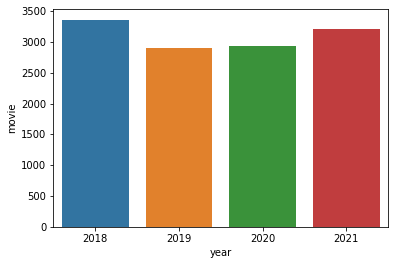

In [513]:
#Plot barchart ว่าแต่ละปีได้หนังมาทั้งหมดเท่าไหร่
ax = sns.barplot(x="year", y="movie", data=movie_year)

## Movie genres and Descriptions

In [514]:
#ทำการ Strip genres และ descriptions
df_movie["genres"] = df_movie["genres"].str.strip()
df_movie["descriptions"] = df_movie["descriptions"].str.strip()

In [515]:
df_movie.tail()

movie  year     genres  \
12407                              Pavement Tune  2021      Drama   
12408                Zack: Enfrentamiento Mortal  2021     Action   
12409                                  Montauk77  2021      Drama   
12410                          Last Warning Shot  2021      Drama   
12411  Mysterious Creatures with Forrest Galante  2021  Adventure   

                                            descriptions  
12407  Pavement Tune is a coming of middle age story ...  
12408  Zack wanders through an unknown place. His onl...  
12409  After a down-on-his-luck ride-share driver rel...  
12410  When Maddy, an unsuspecting teenage girl meets...  
12411  Follows Forrest along with his wife as they tr...

In [516]:
#Check description ของหนังที่มีคำว่า see full summary
df_movie['descriptions'][df_movie['movie']=='The Humans'].values

array(['Set inside a pre-war duplex in downtown Manhattan, The Humans follows the course of an evening in which the Blake family gathers to celebrate Thanksgiving. As darkness falls outside the ...                See full summary\xa0»'],
      dtype=object)

In [517]:
#Check description ของหนังที่มีคำว่า see full summary
df_movie['descriptions'][df_movie['movie']=='Madres'].values

array(["A Mexican-American couple expecting their first child relocate to a migrant farming community in 1970's California. When the wife begins to experience strange symptoms and terrifying ...                See full summary\xa0»"],
      dtype=object)

In [518]:
#ตัดค่าที่เป็น See full summary ออก
df_movie['descriptions'] = df_movie['descriptions'].str.replace('...                See full summary\xa0»','')

<ipython-input-518-05c662350a28>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_movie['descriptions'] = df_movie['descriptions'].str.replace('...                See full summary\xa0»','')


In [519]:
df_movie['descriptions'][df_movie['movie']=='The Humans'].values

array(['Set inside a pre-war duplex in downtown Manhattan, The Humans follows the course of an evening in which the Blake family gathers to celebrate Thanksgiving. As darkness falls outside the '],
      dtype=object)

In [520]:
df_movie['descriptions'][df_movie['movie']=='Madres'].values

array(["A Mexican-American couple expecting their first child relocate to a migrant farming community in 1970's California. When the wife begins to experience strange symptoms and terrifying "],
      dtype=object)

In [521]:
df_movie.to_pickle('df_movie_clean.pickle')

# Encoding genres

ทำการ encoding genres

In [524]:
df_movie = pd.read_pickle('df_movie_clean.pickle')

In [525]:
df_movie.head()

movie  year                     genres  \
0              Venom  2018  Action, Adventure, Sci-Fi   
1  Bohemian Rhapsody  2018    Biography, Drama, Music   
2          Halloween  2018    Crime, Horror, Thriller   
3         Deadpool 2  2018  Action, Adventure, Comedy   
4         Hereditary  2018     Drama, Horror, Mystery   

                                        descriptions  
0  A failed reporter is bonded to an alien entity...  
1  The story of the legendary British rock band Q...  
2  Laurie Strode confronts her long-time foe Mich...  
3  Foul-mouthed mutant mercenary Wade Wilson (a.k...  
4  A grieving family is haunted by tragic and dis...

In [526]:
#สร้าง list ของ Genres ทั้งหมดที่มี
#นำค่าเข้า list
all_genres = df_movie["genres"].tolist()
# Join ข้อมูลทั้งหมดด้วย comma
all_genres = ", ".join(all_genres)
# Split ข้อมูลทั้งหมดด้วย comma แล้วใส่ set เพื่อตัดคำซ้ำ และเก็บไว้ใน list จากนั้น sort ลำดับตัวอักษร
all_genres = sorted(list(set(all_genres.split(", "))))
all_genres

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [527]:
for g in all_genres:
  df_movie[g] = df_movie["genres"].apply(lambda x: 1 if len(set(x.split(", ")).intersection(set([g]))) > 0 else 0)

In [528]:
df_movie.head()

movie  year                     genres  \
0              Venom  2018  Action, Adventure, Sci-Fi   
1  Bohemian Rhapsody  2018    Biography, Drama, Music   
2          Halloween  2018    Crime, Horror, Thriller   
3         Deadpool 2  2018  Action, Adventure, Comedy   
4         Hereditary  2018     Drama, Horror, Mystery   

                                        descriptions  Action  Adventure  \
0  A failed reporter is bonded to an alien entity...       1          1   
1  The story of the legendary British rock band Q...       0          0   
2  Laurie Strode confronts her long-time foe Mich...       0          0   
3  Foul-mouthed mutant mercenary Wade Wilson (a.k...       1          1   
4  A grieving family is haunted by tragic and dis...       0          0   

   Animation  Biography  Comedy  Crime  ...  Mystery  News  Reality-TV  \
0          0          0       0      0  ...        0     0           0   
1          0          1       0      0  ...        0     0           0   
2          0          0       0      1  ...        0     0           0   
3          0          0       1      0  ...        0     0           0   
4          0          0       0      0  ...        1     0           0   

   Romance  Sci-Fi  Sport  Talk-Show  Thriller  War  Western  
0        0       1      0          0         0    0        0  
1        0       0      0          0         0    0        0  
2        0       0      0          0         1    0        0  
3        0       0      0          0         0    0        0  
4        0       0      0          0         0    0        0  

[5 rows x 28 columns]

In [529]:
df_movie.to_pickle('df_movie_encoding.pickle')

# Download Languages Resource

In [684]:
df_movie = pd.read_pickle('df_movie_encoding.pickle')

In [685]:
df_movie.head()

movie  year                     genres  \
0              Venom  2018  Action, Adventure, Sci-Fi   
1  Bohemian Rhapsody  2018    Biography, Drama, Music   
2          Halloween  2018    Crime, Horror, Thriller   
3         Deadpool 2  2018  Action, Adventure, Comedy   
4         Hereditary  2018     Drama, Horror, Mystery   

                                        descriptions  Action  Adventure  \
0  A failed reporter is bonded to an alien entity...       1          1   
1  The story of the legendary British rock band Q...       0          0   
2  Laurie Strode confronts her long-time foe Mich...       0          0   
3  Foul-mouthed mutant mercenary Wade Wilson (a.k...       1          1   
4  A grieving family is haunted by tragic and dis...       0          0   

   Animation  Biography  Comedy  Crime  ...  Mystery  News  Reality-TV  \
0          0          0       0      0  ...        0     0           0   
1          0          1       0      0  ...        0     0           0   
2          0          0       0      1  ...        0     0           0   
3          0          0       1      0  ...        0     0           0   
4          0          0       0      0  ...        1     0           0   

   Romance  Sci-Fi  Sport  Talk-Show  Thriller  War  Western  
0        0       1      0          0         0    0        0  
1        0       0      0          0         0    0        0  
2        0       0      0          0         1    0        0  
3        0       0      0          0         0    0        0  
4        0       0      0          0         0    0        0  

[5 rows x 28 columns]

In [686]:
df_movie.shape

(12412, 28)

## เลือกหนังที่มี Genres มากกว่า 1 แบบ
เพื่อเวลาเข้า train test split แล้วสามารถ stratify ได้

In [687]:
#ดูว่ามีหนังที่มีประเภทของ genres แค่่แบบเดียว มีกี่ประเภท (เพื่อเวลา ทำ Train-test-split แล้วสามารถ startify ได้)
# มีทั้งหมด 169 เรื่อง (169 ประเภทที่มีแบบเดียว)
df_movie.groupby('genres').filter(lambda x : len(x)<=1)

movie  year  \
100                                    Adrift  2018   
122                            The Perfection  2018   
279                                     Slice  2018   
308                                    Damsel  2018   
423    Buñuel en el laberinto de las tortugas  2018   
...                                       ...   ...   
11948               Tales from the Chuckwagon  2021   
11963                   Cannes Without a Plan  2021   
12271                        Whisper: Trinity  2021   
12294                    Best of Mario's Vlog  2021   
12389                         The Audiologist  2021   

                             genres  \
100    Action, Adventure, Biography   
122            Drama, Horror, Music   
279          Comedy, Crime, Fantasy   
308          Comedy, Drama, Western   
423     Animation, Biography, Drama   
...                             ...   
11948                Music, Western   
11963            Comedy, Reality-TV   
12271      Action, Fantasy, Mystery   
12294         Biography, Reality-TV   
12389              Musical, Romance   

                                            descriptions  Action  Adventure  \
100    A true story of survival, as a young couple's ...       1          1   
122    When troubled musical prodigy Charlotte seeks ...       0          0   
279    When a pizza delivery driver is murdered on th...       0          0   
308    It's the Wild West, circa 1870. Samuel Alabast...       0          0   
423    The true story of how Luis Buñuel made his thi...       0          0   
...                                                  ...     ...        ...   
11948  In West Texas circa 1900, cowboys are out on t...       0          0   
11963  Three beautiful LA divorcees impulsively head ...       0          0   
12271  The Whisper, The Wanderer, and The Waymaker ar...       1          0   
12294  Theatrical feature-film edition of Mario's Vlo...       0          0   
12389  An Audiologist fell in love with his patient w...       0          0   

       Animation  Biography  Comedy  Crime  ...  Mystery  News  Reality-TV  \
100            0          1       0      0  ...        0     0           0   
122            0          0       0      0  ...        0     0           0   
279            0          0       1      1  ...        0     0           0   
308            0          0       1      0  ...        0     0           0   
423            1          1       0      0  ...        0     0           0   
...          ...        ...     ...    ...  ...      ...   ...         ...   
11948          0          0       0      0  ...        0     0           0   
11963          0          0       1      0  ...        0     0           1   
12271          0          0       0      0  ...        1     0           0   
12294          0          1       0      0  ...        0     0           1   
12389          0          0       0      0  ...        0     0           0   

       Romance  Sci-Fi  Sport  Talk-Show  Thriller  War  Western  
100          0       0      0          0         0    0        0  
122          0       0      0          0         0    0        0  
279          0       0      0          0         0    0        0  
308          0       0      0          0         0    0        1  
423          0       0      0          0         0    0        0  
...        ...     ...    ...        ...       ...  ...      ...  
11948        0       0      0          0         0    0        1  
11963        0       0      0          0         0    0        0  
12271        0       0      0          0         0    0        0  
12294        0       0      0          0         0    0        0  
12389        1       0      0          0         0    0        0  

[169 rows x 28 columns]

In [688]:
df_movie_less_than_2 = df_movie.groupby('genres').filter(lambda x : len(x)<=1)
df_movie_less_than_2.shape

(169, 28)

In [689]:
#เลือกเฉพาะหนังที่ Genres นับแล้วมีมากกว่า 1 ประเภท
df_movie = df_movie[df_movie.groupby('genres').genres.transform('count')>1].copy() 

In [690]:
df_movie.shape

(12243, 28)

In [691]:
#Value count แล้วมีอย่างน้อย 2 เรื่องต่อแบบ
df_movie['genres'].value_counts()

Drama                         2248
Comedy                        1145
Horror                        1033
Thriller                       730
Comedy, Drama                  390
                              ... 
Animation, Fantasy, Horror       2
Drama, Family, Musical           2
Action, Comedy, Western          2
Fantasy, Musical                 2
Mystery, Western                 2
Name: genres, Length: 329, dtype: int64

In [692]:
df_movie.groupby(['genres'])['movie'].nunique()

genres
Action                       290
Action, Adventure             13
Action, Adventure, Comedy     64
Action, Adventure, Crime      16
Action, Adventure, Drama      43
                            ... 
Thriller, Horror               2
Thriller, War                  2
Thriller, Western              4
War                           27
Western                       71
Name: movie, Length: 329, dtype: int64

พบว่า Game-show มีจำนวนเป็น 0

In [693]:
df_genres = df_movie.iloc[:,4:].sum()
df_genres

Action        1402
Adventure      756
Animation      477
Biography      221
Comedy        3013
Crime          917
Drama         5149
Family         548
Fantasy        460
Game-Show        0
History        132
Horror        2324
Music          195
Musical        148
Mystery        696
News             3
Reality-TV      14
Romance        812
Sci-Fi         668
Sport           97
Talk-Show       15
Thriller      2153
War             72
Western        127
dtype: int64

<AxesSubplot:>

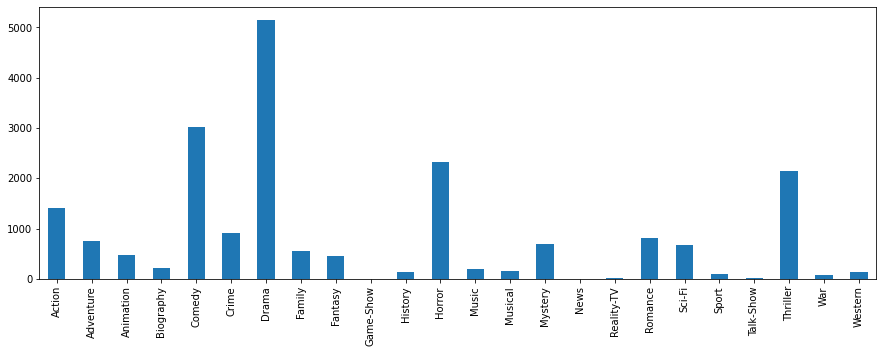

In [694]:
df_genres.plot.bar(figsize=(15,5))

In [695]:
df_movie.drop(columns ='Game-Show', inplace = True)

In [696]:
df_movie.shape

(12243, 27)

In [697]:
all_genres = df_movie["genres"].tolist()
all_genres = ", ".join(all_genres)
all_genres = sorted(list(set(all_genres.split(", "))))
all_genres

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

มีรูปแบบ genres ทั้งหมด 23 แบบ

In [698]:
len(all_genres)

23

## Import Libraries เกี่ยวกับ Text

In [699]:
import nltk
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize, word_tokenize

In [700]:
nltk.download("punkt") #ไว้ตัดคำ
nltk.download("stopwords")  #เป็น list ที่มีให้ไว้อยู่แล้วของ stopwords (ภาษาอังกฤษมีให้)
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /Users/aztip/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/aztip/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Text Cleaning

In [701]:
#ทำให้ descriptions เป็นตัวพิมพ์เล็กก่อน
df_movie['descriptions'] = df_movie['descriptions'].str.lower()

In [702]:
#แทนที่ Description ที่มี space 2 เคาะด้วย space 1 เคาะ
df_movie['descriptions'] = df_movie['descriptions'].str.replace('  ',' ')

In [703]:
#แทนที่ Description ที่มี ' เคาะด้วย space 1 เคาะ
df_movie['descriptions'] = df_movie['descriptions'].str.replace("'",' ')

In [704]:
#แทนที่ Description ที่มี - เคาะด้วย space 1 เคาะ
df_movie['descriptions'] = df_movie['descriptions'].str.replace("-",' ')

In [705]:
#แทนที่ Description ที่มี - เคาะด้วย space 1 เคาะ
df_movie['descriptions'] = df_movie['descriptions'].str.replace(",",' ')

### Word Tokenization
แยกออกเป็น word

In [706]:
#แยก word เป็น Token
df_movie["corpus"] = df_movie["descriptions"].apply(lambda x: word_tokenize(x))

In [707]:
df_movie[['descriptions','corpus']].head()

descriptions  \
0  a failed reporter is bonded to an alien entity...   
1  the story of the legendary british rock band q...   
2  laurie strode confronts her long time foe mich...   
3  foul mouthed mutant mercenary wade wilson (a.k...   
4  a grieving family is haunted by tragic and dis...   

                                              corpus  
0  [a, failed, reporter, is, bonded, to, an, alie...  
1  [the, story, of, the, legendary, british, rock...  
2  [laurie, strode, confronts, her, long, time, f...  
3  [foul, mouthed, mutant, mercenary, wade, wilso...  
4  [a, grieving, family, is, haunted, by, tragic,...

### Stopwords
ตัดคำที่เป็น stopwords ของภาษาอังกฤษออก โดยใช้ data จาก nltk

In [708]:
#ใช้ stopwords ภาษาอังกฤษ
stopwords_ = stopwords.words("english")
print(type(stopwords_))
stopwords_

<class 'list'>


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [709]:
#สร้าง column ใหม่เป็น corpus ที่ตัด stopword ออก
df_movie['corpus_stopwords'] = df_movie['corpus'].apply(lambda x: list(set(x).difference(set(stopwords_))))

In [710]:
df_movie[['descriptions','corpus','corpus_stopwords']].head()

descriptions  \
0  a failed reporter is bonded to an alien entity...   
1  the story of the legendary british rock band q...   
2  laurie strode confronts her long time foe mich...   
3  foul mouthed mutant mercenary wade wilson (a.k...   
4  a grieving family is haunted by tragic and dis...   

                                              corpus  \
0  [a, failed, reporter, is, bonded, to, an, alie...   
1  [the, story, of, the, legendary, british, rock...   
2  [laurie, strode, confronts, her, long, time, f...   
3  [foul, mouthed, mutant, mercenary, wade, wilso...   
4  [a, grieving, family, is, haunted, by, tragic,...   

                                    corpus_stopwords  
0  [decides, one, takes, reporter, invaded, entit...  
1  [leading, story, lead, band, legendary, freddi...  
2  [decades, halloween, long, laurie, ., four, na...  
3  [boy, assembles, wade, cyborg, supernatural, y...  
4  [haunted, occurrences, family, tragic, grievin...

### Stemmer
การลดรูปคำ

In [711]:
stemmer = PorterStemmer() #stemmer คือการลดรูปของคำ
#สร้าง column ที่ปรับคำด้วย stemmer
df_movie['corpus_stemmer'] = df_movie['corpus_stopwords'].apply(lambda x: [stemmer.stem(i) for i in x])

In [712]:
df_movie[['descriptions','corpus','corpus_stopwords','corpus_stemmer']].head()

descriptions  \
0  a failed reporter is bonded to an alien entity...   
1  the story of the legendary british rock band q...   
2  laurie strode confronts her long time foe mich...   
3  foul mouthed mutant mercenary wade wilson (a.k...   
4  a grieving family is haunted by tragic and dis...   

                                              corpus  \
0  [a, failed, reporter, is, bonded, to, an, alie...   
1  [the, story, of, the, legendary, british, rock...   
2  [laurie, strode, confronts, her, long, time, f...   
3  [foul, mouthed, mutant, mercenary, wade, wilso...   
4  [a, grieving, family, is, haunted, by, tragic,...   

                                    corpus_stopwords  \
0  [decides, one, takes, reporter, invaded, entit...   
1  [leading, story, lead, band, legendary, freddi...   
2  [decades, halloween, long, laurie, ., four, na...   
3  [boy, assembles, wade, cyborg, supernatural, y...   
4  [haunted, occurrences, family, tragic, grievin...   

                                      corpus_stemmer  
0  [decid, one, take, report, invad, entiti, bond...  
1  [lead, stori, lead, band, legendari, freddi, )...  
2  [decad, halloween, long, lauri, ., four, narro...  
3  [boy, assembl, wade, cyborg, supernatur, young...  
4  [haunt, occurr, famili, tragic, griev, ., dist...

### Number removal

In [713]:
df_movie['corpus_number_removal'] = df_movie['corpus_stemmer'].apply(lambda x: [i for i in x if not i.isnumeric()])

In [714]:
df_movie[['descriptions','corpus','corpus_stopwords','corpus_stemmer','corpus_number_removal']].head()

descriptions  \
0  a failed reporter is bonded to an alien entity...   
1  the story of the legendary british rock band q...   
2  laurie strode confronts her long time foe mich...   
3  foul mouthed mutant mercenary wade wilson (a.k...   
4  a grieving family is haunted by tragic and dis...   

                                              corpus  \
0  [a, failed, reporter, is, bonded, to, an, alie...   
1  [the, story, of, the, legendary, british, rock...   
2  [laurie, strode, confronts, her, long, time, f...   
3  [foul, mouthed, mutant, mercenary, wade, wilso...   
4  [a, grieving, family, is, haunted, by, tragic,...   

                                    corpus_stopwords  \
0  [decides, one, takes, reporter, invaded, entit...   
1  [leading, story, lead, band, legendary, freddi...   
2  [decades, halloween, long, laurie, ., four, na...   
3  [boy, assembles, wade, cyborg, supernatural, y...   
4  [haunted, occurrences, family, tragic, grievin...   

                                      corpus_stemmer  \
0  [decid, one, take, report, invad, entiti, bond...   
1  [lead, stori, lead, band, legendari, freddi, )...   
2  [decad, halloween, long, lauri, ., four, narro...   
3  [boy, assembl, wade, cyborg, supernatur, young...   
4  [haunt, occurr, famili, tragic, griev, ., dist...   

                               corpus_number_removal  
0  [decid, one, take, report, invad, entiti, bond...  
1  [lead, stori, lead, band, legendari, freddi, )...  
2  [decad, halloween, long, lauri, ., four, narro...  
3  [boy, assembl, wade, cyborg, supernatur, young...  
4  [haunt, occurr, famili, tragic, griev, ., dist...

### Bag of Words (BOWS)

In [715]:
df_movie['new_corpus'] = df_movie['corpus_number_removal'].apply(lambda x: ",".join(x))
df_movie[['descriptions','corpus','corpus_stopwords','corpus_stemmer','corpus_number_removal','new_corpus']].head()

descriptions  \
0  a failed reporter is bonded to an alien entity...   
1  the story of the legendary british rock band q...   
2  laurie strode confronts her long time foe mich...   
3  foul mouthed mutant mercenary wade wilson (a.k...   
4  a grieving family is haunted by tragic and dis...   

                                              corpus  \
0  [a, failed, reporter, is, bonded, to, an, alie...   
1  [the, story, of, the, legendary, british, rock...   
2  [laurie, strode, confronts, her, long, time, f...   
3  [foul, mouthed, mutant, mercenary, wade, wilso...   
4  [a, grieving, family, is, haunted, by, tragic,...   

                                    corpus_stopwords  \
0  [decides, one, takes, reporter, invaded, entit...   
1  [leading, story, lead, band, legendary, freddi...   
2  [decades, halloween, long, laurie, ., four, na...   
3  [boy, assembles, wade, cyborg, supernatural, y...   
4  [haunted, occurrences, family, tragic, grievin...   

                                      corpus_stemmer  \
0  [decid, one, take, report, invad, entiti, bond...   
1  [lead, stori, lead, band, legendari, freddi, )...   
2  [decad, halloween, long, lauri, ., four, narro...   
3  [boy, assembl, wade, cyborg, supernatur, young...   
4  [haunt, occurr, famili, tragic, griev, ., dist...   

                               corpus_number_removal  \
0  [decid, one, take, report, invad, entiti, bond...   
1  [lead, stori, lead, band, legendari, freddi, )...   
2  [decad, halloween, long, lauri, ., four, narro...   
3  [boy, assembl, wade, cyborg, supernatur, young...   
4  [haunt, occurr, famili, tragic, griev, ., dist...   

                                          new_corpus  
0  decid,one,take,report,invad,entiti,bond,fail,a...  
1  lead,stori,lead,band,legendari,freddi,),(,.,fa...  
2  decad,halloween,long,lauri,.,four,narrowli,mas...  
3  boy,assembl,wade,cyborg,supernatur,young,foul,...  
4         haunt,occurr,famili,tragic,griev,.,disturb

In [716]:
one_word = df_movie["new_corpus"].tolist()
one_word = ",".join(one_word)
one_word = sorted(list(one_word.split(",")))
print(one_word)

['!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '$', '$', '$', '$', '$', '$', '$', '$', '$', '$', '$', '$', '$', '$', '$', '$', '$', '$', '$', '$', '$', '$', '$', '$', '$', '$', '$', '$', '%', '%', '%', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', "''", "''", "''", "''", "''", "''", "''", "''", "''", "''", "''", "''", "''", "''", "''", "''", "''", "''", "''", "''", "''", "''", "''", "''", "''", "''"

มีอักขระพิเศษ หลายอันที่ควรตัดออก

In [721]:
add_stopwords=[' %','%',"''", " ''"," 's",' ‘','!','#','$','&',"'s","'",'(',')','*', '+', '-', '--', '.','..',
               '...','....','......','........','/',':',';','?','@','[',']','`','``','{', '}','~','»','—', '’','‘']

In [722]:
df_movie['corpus_new_stopwords'] = df_movie['corpus_number_removal'].apply(lambda x: list(set(x).difference(set(add_stopwords))))
df_movie[['descriptions','corpus','corpus_stopwords','corpus_stemmer','corpus_number_removal','new_corpus','corpus_new_stopwords']].head()

descriptions  \
0  a failed reporter is bonded to an alien entity...   
1  the story of the legendary british rock band q...   
2  laurie strode confronts her long time foe mich...   
3  foul mouthed mutant mercenary wade wilson (a.k...   
4  a grieving family is haunted by tragic and dis...   

                                              corpus  \
0  [a, failed, reporter, is, bonded, to, an, alie...   
1  [the, story, of, the, legendary, british, rock...   
2  [laurie, strode, confronts, her, long, time, f...   
3  [foul, mouthed, mutant, mercenary, wade, wilso...   
4  [a, grieving, family, is, haunted, by, tragic,...   

                                    corpus_stopwords  \
0  [decides, one, takes, reporter, invaded, entit...   
1  [leading, story, lead, band, legendary, freddi...   
2  [decades, halloween, long, laurie, ., four, na...   
3  [boy, assembles, wade, cyborg, supernatural, y...   
4  [haunted, occurrences, family, tragic, grievin...   

                                      corpus_stemmer  \
0  [decid, one, take, report, invad, entiti, bond...   
1  [lead, stori, lead, band, legendari, freddi, )...   
2  [decad, halloween, long, lauri, ., four, narro...   
3  [boy, assembl, wade, cyborg, supernatur, young...   
4  [haunt, occurr, famili, tragic, griev, ., dist...   

                               corpus_number_removal  \
0  [decid, one, take, report, invad, entiti, bond...   
1  [lead, stori, lead, band, legendari, freddi, )...   
2  [decad, halloween, long, lauri, ., four, narro...   
3  [boy, assembl, wade, cyborg, supernatur, young...   
4  [haunt, occurr, famili, tragic, griev, ., dist...   

                                          new_corpus  \
0  decid,one,take,report,invad,entiti,bond,fail,a...   
1  lead,stori,lead,band,legendari,freddi,),(,.,fa...   
2  decad,halloween,long,lauri,.,four,narrowli,mas...   
3  boy,assembl,wade,cyborg,supernatur,young,foul,...   
4         haunt,occurr,famili,tragic,griev,.,disturb   

                                corpus_new_stopwords  
0  [one, decid, entiti, report, invad, fail, symb...  
1  [rock, famou, british, legendari, lead, perfor...  
2  [narrowli, halloween, kill, haunt, long, figur...  
3  [boy, wade, cyborg, young, mouth, foul, rogu, ...  
4    [griev, tragic, haunt, occurr, disturb, famili]

In [723]:
df_movie['new_corpus_2'] = df_movie['corpus_new_stopwords'].apply(lambda x: ",".join(x))

In [724]:
one_word = df_movie["new_corpus_2"].tolist()
one_word = ",".join(one_word)
one_word = sorted(list(one_word.split(",")))
print(one_word)

['.base', '.com', '.see', '///signal', '/date', '/thriller', '/woman', '000th', '00k9', '1.0', '1/2', '1/3', '10.', '10/27/08', '100+', '100+', '10th', '10th', '10th', '11th', '11th', '11th', '11th', '12/21/12', '12th', '13th', '13th', '13th', '13th', '13th', '13th', '14th', '14th', '15th', '15th', '15th', '16mm', '16mm', '16th', '16th', '17th', '1839.', '1843.', '1848.', '1854.', '1857.', '1864.', '1892.', '18th', '18th', '18th', '18th', '19.', '19.', '19.', '1909.', '1911.', '1917.', '1919.', '1932.', '1943.', '1943.', '1944.', '1944.', '1945.', '1947.', '1969.', '1971.', '1972.', '1977.', '1977.', '1978.', '1978.', '1979.', '1987.', '1987.', '1987.', '1988.', '1988.', '1992.', '1993.', '1994.', '1998.', '19th', '19th', '19th', '19th', '19th', '19th', '19th', '19th', '19th', '1:00am', '1m', '1st', '1st', '1st', '1st', '1st', '2.', '2.', '2007.', '2008.', '200th', '2010.', '2012.', '2013.', '2017.', '2018.', '2018.', '2018.', '2019.', '2020.', '2020.', '2020.', '2020.', '2020.', '2021

มีคำอยู่ทั้งหมด 1528 คำ

In [726]:
one_word_set = set(one_word)
len(one_word_set)

15628

ดูว่าจำนวน word จากการ Tokenization แล้วมีคำทั้งหมดกี่คำ ที่เป็นยอดฮิต

In [727]:
from collections import Counter
counter = Counter(one_word)
counter_common = counter.most_common(20)
counter_common

[('life', 1437),
 ('find', 1369),
 ('young', 1342),
 ('friend', 1107),
 ('man', 1014),
 ('famili', 998),
 ('one', 986),
 ('two', 981),
 ('new', 974),
 ('year', 957),
 ('stori', 942),
 ('live', 918),
 ('love', 855),
 ('world', 811),
 ('woman', 770),
 ('take', 768),
 ('get', 748),
 ('must', 710),
 ('film', 705),
 ('home', 598)]

In [728]:
type(counter_common)

list

In [729]:
counter_dict = dict(counter_common)
counter_dict = dict(sorted(counter_dict.items(), key=lambda item: item[1],reverse=True))
counter_dict

{'life': 1437,
 'find': 1369,
 'young': 1342,
 'friend': 1107,
 'man': 1014,
 'famili': 998,
 'one': 986,
 'two': 981,
 'new': 974,
 'year': 957,
 'stori': 942,
 'live': 918,
 'love': 855,
 'world': 811,
 'woman': 770,
 'take': 768,
 'get': 748,
 'must': 710,
 'film': 705,
 'home': 598}

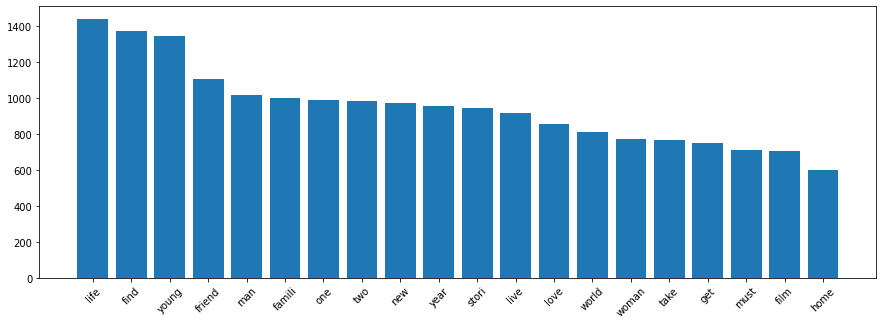

In [730]:
plt.figure(figsize=(15,5))
plt.bar(range(len(counter_dict)), list(counter_dict.values()), align='center')
plt.xticks(range(len(counter_dict)), list(counter_dict.keys()),rotation=45)

plt.show()

### สร้าง Movie ID ให้แต่ละ Doct

In [731]:
df_movie = df_movie.reset_index(drop=True)
df_movie = df_movie.reset_index().rename(columns={"index":"movieid"})
df_movie

movieid                                      movie  year  \
0            0                                      Venom  2018   
1            1                          Bohemian Rhapsody  2018   
2            2                                  Halloween  2018   
3            3                                 Deadpool 2  2018   
4            4                                 Hereditary  2018   
...        ...                                        ...   ...   
12238    12238                              Pavement Tune  2021   
12239    12239                Zack: Enfrentamiento Mortal  2021   
12240    12240                                  Montauk77  2021   
12241    12241                          Last Warning Shot  2021   
12242    12242  Mysterious Creatures with Forrest Galante  2021   

                          genres  \
0      Action, Adventure, Sci-Fi   
1        Biography, Drama, Music   
2        Crime, Horror, Thriller   
3      Action, Adventure, Comedy   
4         Drama, Horror, Mystery   
...                          ...   
12238                      Drama   
12239                     Action   
12240                      Drama   
12241                      Drama   
12242                  Adventure   

                                            descriptions  Action  Adventure  \
0      a failed reporter is bonded to an alien entity...       1          1   
1      the story of the legendary british rock band q...       0          0   
2      laurie strode confronts her long time foe mich...       0          0   
3      foul mouthed mutant mercenary wade wilson (a.k...       1          1   
4      a grieving family is haunted by tragic and dis...       0          0   
...                                                  ...     ...        ...   
12238  pavement tune is a coming of middle age story ...       0          0   
12239  zack wanders through an unknown place. his onl...       1          0   
12240  after a down on his luck ride share driver rel...       0          0   
12241  when maddy  an unsuspecting teenage girl meets...       0          0   
12242  follows forrest along with his wife as they tr...       0          1   

       Animation  Biography  Comedy  ...  Thriller  War  Western  \
0              0          0       0  ...         0    0        0   
1              0          1       0  ...         0    0        0   
2              0          0       0  ...         1    0        0   
3              0          0       1  ...         0    0        0   
4              0          0       0  ...         0    0        0   
...          ...        ...     ...  ...       ...  ...      ...   
12238          0          0       0  ...         0    0        0   
12239          0          0       0  ...         0    0        0   
12240          0          0       0  ...         0    0        0   
12241          0          0       0  ...         0    0        0   
12242          0          0       0  ...         0    0        0   

                                                  corpus  \
0      [a, failed, reporter, is, bonded, to, an, alie...   
1      [the, story, of, the, legendary, british, rock...   
2      [laurie, strode, confronts, her, long, time, f...   
3      [foul, mouthed, mutant, mercenary, wade, wilso...   
4      [a, grieving, family, is, haunted, by, tragic,...   
...                                                  ...   
12238  [pavement, tune, is, a, coming, of, middle, ag...   
12239  [zack, wanders, through, an, unknown, place, ....   
12240  [after, a, down, on, his, luck, ride, share, d...   
12241  [when, maddy, an, unsuspecting, teenage, girl,...   
12242  [follows, forrest, along, with, his, wife, as,...   

                                        corpus_stopwords  \
0      [decides, one, takes, reporter, invaded, entit...   
1      [leading, story, lead, band, legendary, freddi...   
2      [decades, halloween, long, laurie, ., four, na...   
3      [boy, assembles, wade, cyborg, supe

### Join Corpus

In [732]:
corpus = df_movie['new_corpus_2'].tolist()

In [733]:
corpus

['one,decid,entiti,report,invad,fail,symbiot,like,alien,earth,bond,protect,take,mani',
 'rock,famou,british,legendari,lead,perform,mercuri,singer,band,aid,stori,queen,live,freddi',
 'narrowli,halloween,kill,haunt,long,figur,escap,confront,four,foe,lauri,decad,ago,michael,sinc,mask,time,night,spree,strode,myer',
 'boy,wade,cyborg,young,mouth,foul,rogu,cabl,team,brutal,a.k.a,abil,assembl,travel,mutant,supernatur,protect,mercenari,time,deadpool,fellow,wilson',
 'griev,tragic,haunt,occurr,disturb,famili',
 'defeat,sacrific,put,thano,univers,blitz,must,end,power,attempt,alli,ruin,will,devast,aveng',
 'teen,becom,five,threat,univers,must,realiti,moral,power,join,spider,man,dimens,stop,individu,mile',
 'post,forc,apocalypt,silenc,monster,world,sensit,live,hear,hide,ultra,famili',
 'creator,easter,find,challeng,fortun,die,make,user,finder,realiti,control,give,posthum,virtual,oasi,egg,call,world',
 'challeng,lead,futur,wakanda,challa,must,forward,confront,step,new,advanc,kingdom,past,countri,he

### Train Test Split

In [734]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [742]:
df_movie.shape

(12243, 35)

In [735]:
train,test = train_test_split(df_movie, test_size = 0.3, stratify = df_movie['genres'], random_state = 42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [736]:
train.shape

(8570, 35)

In [737]:
train.head()

movieid                              movie  year  \
1364      1364                               Lost  2018   
5689      5689                    Surfing the Web  2019   
3270      3270                           YANG\YIN  2018   
11338    11338                              Melee  2021   
10093    10093  Attack of the Giant Blurry Finger  2021   

                       genres  \
1364                    Drama   
5689                   Comedy   
3270                    Drama   
11338                  Action   
10093  Comedy, Horror, Sci-Fi   

                                            descriptions  Action  Adventure  \
1364   written and directed by 16 year old aaron avon...       0          0   
5689   a wild and strange collection of raw uninhibit...       0          0   
3270   three men with mental and emotional affliction...       0          0   
11338  a police officer named kristen goes for a jog ...       1          0   
10093  in this zany  dry  tongue in cheek sci fi horr...       0          0   

       Animation  Biography  Comedy  ...  Thriller  War  Western  \
1364           0          0       0  ...         0    0        0   
5689           0          0       1  ...         0    0        0   
3270           0          0       0  ...         0    0        0   
11338          0          0       0  ...         0    0        0   
10093          0          0       1  ...         0    0        0   

                                                  corpus  \
1364   [written, and, directed, by, 16, year, old, aa...   
5689   [a, wild, and, strange, collection, of, raw, u...   
3270   [three, men, with, mental, and, emotional, aff...   
11338  [a, police, officer, named, kristen, goes, for...   
10093  [in, this, zany, dry, tongue, in, cheek, sci, ...   

                                        corpus_stopwords  \
1364   [boy, story, florida, lost, johnson, young, aa...   
5689   [wide, spoofed, uncut, collection, news, spoof...   
3270   [edge, three, emotional, struggle, visions, da...   
11338  [melee, cops, jog, find, officer, goes, trail,...   
10093  [finger, dry, tongue, interrupting, lonely, ch...   

                                          corpus_stemmer  \
1364   [boy, stori, florida, lost, johnson, young, aa...   
5689   [wide, spoof, uncut, collect, news, spoof, com...   
3270   [edg, three, emot, struggl, vision, day, affli...   
11338  [mele, cop, jog, find, offic, goe, trail, crim...   
10093  [finger, dri, tongu, interrupt, lone, cheek, h...   

                                   corpus_number_removal  \
1364   [boy, stori, florida, lost, johnson, young, aa...   
5689   [wide, spoof, uncut, collect, news, spoof, com...   
3270   [edg, three, emot, struggl, vision, day, affli...   
11338  [mele, cop, jog, find, offic, goe, trail, crim...   
10093  [finger, dri, tongu, interrupt, lone, cheek, h...   

                                              new_corpus  \
1364   boy,stori,florida,lost,johnson,young,aaron,avo...   
5689   wide,spoof,uncut,collect,news,spoof,commerci,r...   
3270   edg,three,emot,struggl,vision,day,afflict,evol...   
11338  mele,cop,jog,find,offic,goe,trail,crimin,krist...   
10093  finger,dri,tongu,interrupt,lone,cheek,horror,y...   

                                    corpus_new_stopwords  \
1364   [boy, florida, lost, johnson, young, aaron, av...   
5689   [wide, uncut, commerci, skit, news, movi, spoo...   
3270   [emot, struggl, mysteri, conscious, exist, thr...   
11338  [find, jog, polic, goe, middl, mele, crimin, n...   
10093  [finger, interrupt, come, dri, cheek, horror, ...   

                                            new_corpus_2  
1364   boy,florida,lost,johnson,young,aaron,avont,sou...  
5689   wide,uncut,commerci,skit,news,movi,spoof,raw,s...  
3270   emot,struggl,mysteri,conscious,exist,three,vis...  
11338  find,jog,polic,goe,middl,mele,crimin,name,trai...  
10093  finger,interrupt,come,dri,cheek,horror,young,t...  

[5 rows x 35 columns]

In [738]:
test.shape

(3673, 35)

In [739]:
test.head(5)

movieid                        movie  year            genres  \
2740      2740            Between the Walls  2018          Thriller   
1432      1432                    Trickster  2018  Horror, Thriller   
11906    11906          A Personal Pandemic  2021             Drama   
10357    10357  Popovich: Road to Hollywood  2021    Comedy, Family   
8144      8144                    Get Bossy  2020     Comedy, Crime   

                                            descriptions  Action  Adventure  \
2740   a man awakens in a cabin like room with no rec...       0          0   
1432   lucid dreaming forces the dreamer s dreamworld...       0          0   
11906  can a failing marriage survive a stay at home ...       0          0   
10357  get ready for a fun filled  fast paced family ...       0          0   
8144   in this stoner detective comedy  a cannabis lo...       0          0   

       Animation  Biography  Comedy  ...  Thriller  War  Western  \
2740           0          0       0  ...         1    0        0   
1432           0          0       0  ...         1    0        0   
11906          0          0       0  ...         0    0        0   
10357          0          0       1  ...         0    0        0   
8144           0          0       1  ...         0    0        0   

                                                  corpus  \
2740   [a, man, awakens, in, a, cabin, like, room, wi...   
1432   [lucid, dreaming, forces, the, dreamer, s, dre...   
11906  [can, a, failing, marriage, survive, a, stay, ...   
10357  [get, ready, for, a, fun, filled, fast, paced,...   
8144   [in, this, stoner, detective, comedy, a, canna...   

                                        corpus_stopwords  \
2740   [recollection, remain, safe, woman, cabin, lik...   
1432   [waking, know, dreamer, really, ?, dreams, dre...   
11906  [survive, wife, home, enthusiasm, reignite, co...   
10357  [paced, piece, get, stunts, family, circus, re...   
8144   [eye, cia, villain, bring, former, uncover, ca...   

                                          corpus_stemmer  \
2740   [recollect, remain, safe, woman, cabin, like, ...   
1432   [wake, know, dreamer, realli, ?, dream, dreamw...   
11906  [surviv, wife, home, enthusiasm, reignit, comp...   
10357  [pace, piec, get, stunt, famili, circu, readi,...   
8144   [eye, cia, villain, bring, former, uncov, cann...   

                                   corpus_number_removal  \
2740   [recollect, remain, safe, woman, cabin, like, ...   
1432   [wake, know, dreamer, realli, ?, dream, dreamw...   
11906  [surviv, wife, home, enthusiasm, reignit, comp...   
10357  [pace, piec, get, stunt, famili, circu, readi,...   
8144   [eye, cia, villain, bring, former, uncov, cann...   

                                              new_corpus  \
2740   recollect,remain,safe,woman,cabin,like,awaken,...   
1432   wake,know,dreamer,realli,?,dream,dreamworld,tr...   
11906  surviv,wife,home,enthusiasm,reignit,complac,st...   
10357  pace,piec,get,stunt,famili,circu,readi,:,.,fas...   
8144   eye,cia,villain,bring,former,uncov,cannabi,con...   

                                    corpus_new_stopwords  \
2740   [remain, woman, safe, awaken, cabin, like, vir...   
1432   [doorway, one, know, forc, feel, dreamer, merg...   
11906  [dreami, wife, home, enthusiasm, complac, marr...   
10357  [featur, readi, amaz, get, fast, take, slapsti...   
8144   [eye, cia, villain, uncov, bring, detect, love...   

                                            new_corpus_2  
2740   remain,woman,safe,awaken,cabin,like,viru,lurk,...  
1432   doorway,one,know,forc,feel,dreamer,merg,dream,...  
11906  dreami,wife,home,enthusiasm,complac,marriag,ch...  
10357  featur,readi,amaz,get,fast,take,slapstick,popo...  
8144   eye,cia,villain,uncov,bring,detect,love,former...  

[5 rows x 35 columns]

### TFIDF

In [669]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [670]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)

In [671]:
print(vectorizer.get_feature_names())

['000', '000th', '00am', '00k9', '02', '07', '08', '10', '100', '10th', '11', '111', '11th', '12', '12th', '13th', '14th', '15', '150', '15th', '16mm', '16th', '17th', '1839', '1843', '1848', '1854', '1857', '1864', '1892', '18th', '19', '1909', '1911', '1917', '1919', '1932', '1943', '1944', '1945', '1947', '1969', '1971', '1972', '1977', '1978', '1979', '1987', '1988', '1992', '1993', '1994', '1998', '19th', '1m', '1st', '20', '2007', '2008', '200th', '2010', '2012', '2013', '2017', '2018', '2019', '2020', '2021', '2022', '2037', '2039', '20th', '21', '21st', '22', '22nd', '24th', '24year', '25', '25th', '25yr', '27', '27th', '28', '2d', '2nd', '2rd', '30', '30th', '31st', '35mm', '35th', '3d', '3rd', '3w', '3x', '40', '4044', '4077th', '40th', '41st', '4225', '450', '45th', '46th', '4k', '4th', '50', '500', '50k', '50m', '51', '5am', '5g', '5th', '600', '60k', '666', '6am', '6th', '75', '7th', '8beat', '8th', '90', '99th', '9mm', '9theori', 'aa', 'aaa', 'aach', 'aaliyah', 'aaron', '

In [763]:
len(vectorizer.get_feature_names())

15455

In [740]:
tfidf.shape

(12243, 15455)

In [744]:
type(tfidf)

scipy.sparse.csr.csr_matrix

In [748]:
#แปลง tfidf เป็น Dataframe
X = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())
X.head()

000  000th  00am  00k9   02   07   08   10  100  10th  ...  zoom  zorro  \
0  0.0    0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0    0.0   
1  0.0    0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0    0.0   
2  0.0    0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0    0.0   
3  0.0    0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0    0.0   
4  0.0    0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0    0.0   

   zot  zouzou  zoë   zu  zula  zumba  zunga  ángel  
0  0.0     0.0  0.0  0.0   0.0    0.0    0.0    0.0  
1  0.0     0.0  0.0  0.0   0.0    0.0    0.0    0.0  
2  0.0     0.0  0.0  0.0   0.0    0.0    0.0    0.0  
3  0.0     0.0  0.0  0.0   0.0    0.0    0.0    0.0  
4  0.0     0.0  0.0  0.0   0.0    0.0    0.0    0.0  

[5 rows x 15455 columns]

In [749]:
train["movieid"].tolist()

[1364,
 5689,
 3270,
 11338,
 10093,
 5393,
 556,
 4740,
 11292,
 1499,
 551,
 10478,
 9777,
 1728,
 6601,
 10683,
 7463,
 8931,
 6580,
 1914,
 2272,
 2789,
 3738,
 6824,
 2844,
 5332,
 2968,
 5639,
 11115,
 9693,
 3062,
 3610,
 6272,
 10495,
 11275,
 616,
 536,
 963,
 3009,
 8479,
 8736,
 330,
 9322,
 7221,
 5818,
 72,
 11940,
 1395,
 9417,
 9074,
 10964,
 4727,
 9434,
 7180,
 6197,
 10818,
 8125,
 11368,
 9662,
 6409,
 9314,
 5965,
 2160,
 10041,
 4787,
 295,
 9588,
 873,
 7825,
 8618,
 10750,
 1474,
 11149,
 7403,
 491,
 5820,
 5580,
 742,
 11337,
 7583,
 3114,
 10829,
 3227,
 1509,
 7774,
 4338,
 1945,
 3109,
 9493,
 4655,
 11715,
 8695,
 5185,
 6564,
 4615,
 10645,
 2799,
 1715,
 9370,
 1632,
 10345,
 12073,
 7955,
 8721,
 6398,
 3539,
 5312,
 11723,
 6715,
 6020,
 9953,
 10889,
 2317,
 4346,
 5042,
 11719,
 11937,
 5946,
 4408,
 11141,
 1888,
 81,
 480,
 11450,
 9181,
 7329,
 7132,
 10297,
 11716,
 4076,
 4988,
 9502,
 9342,
 11164,
 3883,
 5100,
 8334,
 1238,
 3450,
 5648,
 7504

In [673]:
#**** แปลงข้้อมูลเป็น array
# X = tfidf.toarray() #จากที่ละ corpus
# X_train = X[train["movieid"].tolist(),:]
# X_test = X[test["movieid"].tolist(),:]

In [752]:
X_train = X.iloc[train["movieid"].tolist()]
X_test = X.iloc[test["movieid"].tolist()]

In [755]:
X_train.head()

000  000th  00am  00k9   02   07   08   10  100  10th  ...  zoom  \
1364   0.0    0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0   
5689   0.0    0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0   
3270   0.0    0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0   
11338  0.0    0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0   
10093  0.0    0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0   

       zorro  zot  zouzou  zoë   zu  zula  zumba  zunga  ángel  
1364     0.0  0.0     0.0  0.0  0.0   0.0    0.0    0.0    0.0  
5689     0.0  0.0     0.0  0.0  0.0   0.0    0.0    0.0    0.0  
3270     0.0  0.0     0.0  0.0  0.0   0.0    0.0    0.0    0.0  
11338    0.0  0.0     0.0  0.0  0.0   0.0    0.0    0.0    0.0  
10093    0.0  0.0     0.0  0.0  0.0   0.0    0.0    0.0    0.0  

[5 rows x 15455 columns]

In [753]:
X_train.shape

(8570, 15455)

In [756]:
X_test.head()

000  000th  00am  00k9   02   07   08   10  100  10th  ...  zoom  \
2740   0.0    0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0   
1432   0.0    0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0   
11906  0.0    0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0   
10357  0.0    0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0   
8144   0.0    0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0   

       zorro  zot  zouzou  zoë   zu  zula  zumba  zunga  ángel  
2740     0.0  0.0     0.0  0.0  0.0   0.0    0.0    0.0    0.0  
1432     0.0  0.0     0.0  0.0  0.0   0.0    0.0    0.0    0.0  
11906    0.0  0.0     0.0  0.0  0.0   0.0    0.0    0.0    0.0  
10357    0.0  0.0     0.0  0.0  0.0   0.0    0.0    0.0    0.0  
8144     0.0  0.0     0.0  0.0  0.0   0.0    0.0    0.0    0.0  

[5 rows x 15455 columns]

In [754]:
X_test.shape

(3673, 15455)

In [757]:
#y = df_movie.loc[:,all_genres].values #จาก columns ที่เป็น genres ทั้งหมด
y_train = df_movie.loc[train["movieid"].tolist(),all_genres]
y_test = df_movie.loc[test["movieid"].tolist(),all_genres]


In [758]:
y_train.head()

Action  Adventure  Animation  Biography  Comedy  Crime  Drama  Family  \
1364        0          0          0          0       0      0      1       0   
5689        0          0          0          0       1      0      0       0   
3270        0          0          0          0       0      0      1       0   
11338       1          0          0          0       0      0      0       0   
10093       0          0          0          0       1      0      0       0   

       Fantasy  History  ...  Mystery  News  Reality-TV  Romance  Sci-Fi  \
1364         0        0  ...        0     0           0        0       0   
5689         0        0  ...        0     0           0        0       0   
3270         0        0  ...        0     0           0        0       0   
11338        0        0  ...        0     0           0        0       0   
10093        0        0  ...        0     0           0        0       1   

       Sport  Talk-Show  Thriller  War  Western  
1364       0          0         0    0        0  
5689       0          0         0    0        0  
3270       0          0         0    0        0  
11338      0          0         0    0        0  
10093      0          0         0    0        0  

[5 rows x 23 columns]

In [759]:
y_train.shape

(8570, 23)

In [760]:
y_test.head()

Action  Adventure  Animation  Biography  Comedy  Crime  Drama  Family  \
2740        0          0          0          0       0      0      0       0   
1432        0          0          0          0       0      0      0       0   
11906       0          0          0          0       0      0      1       0   
10357       0          0          0          0       1      0      0       1   
8144        0          0          0          0       1      1      0       0   

       Fantasy  History  ...  Mystery  News  Reality-TV  Romance  Sci-Fi  \
2740         0        0  ...        0     0           0        0       0   
1432         0        0  ...        0     0           0        0       0   
11906        0        0  ...        0     0           0        0       0   
10357        0        0  ...        0     0           0        0       0   
8144         0        0  ...        0     0           0        0       0   

       Sport  Talk-Show  Thriller  War  Western  
2740       0          0         1    0        0  
1432       0          0         1    0        0  
11906      0          0         0    0        0  
10357      0          0         0    0        0  
8144       0          0         0    0        0  

[5 rows x 23 columns]

In [761]:
y_test.shape

(3673, 23)

# Model

https://scikit-learn.org/stable/modules/multiclass.html#multiclass-multioutput-classification

จากข้อมูลของ scikitlearn 
Alogorithm Naive Bayes ไม่สามารถ Deal กับ Multilabel classification ได้ แต่สามารถ 
Deal กับ Multiclass classification ได้

## Naive Bayes

In [774]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_auc_score, precision_score
from sklearn.metrics import recall_score, f1_score,average_precision_score, precision_recall_fscore_support

เนื่องจาก Naive Bayes ไม่รองรับ y ที่เป็น multiple array จึงเลือกใช้ Multiclass classification ด้วย OneVSRest classifier

In [767]:
# y_train_NB = df_movie.loc[train["movieid"].tolist(),'genres'].values
# y_test_NB = df_movie.loc[test["movieid"].tolist(),'genres'].values

In [775]:
OvR = OneVsRestClassifier(BernoulliNB()).fit(X_train, y_train)
#clf_NB = BernoulliNB()
#clf_NB.fit(X_train, y_train_NB)

In [776]:
y_pred_OvR = OvR.predict(X_test)
#y_pred_NB = clf_NB.predict(X_test)

In [777]:
y_pred_OvR

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [778]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_OvR))

              precision    recall  f1-score   support

           0       0.53      0.09      0.15       418
           1       0.67      0.01      0.02       226
           2       0.00      0.00      0.00       143
           3       0.00      0.00      0.00        67
           4       0.60      0.25      0.35       901
           5       0.25      0.01      0.01       273
           6       0.63      0.59      0.61      1542
           7       0.00      0.00      0.00       167
           8       0.00      0.00      0.00       139
           9       0.00      0.00      0.00        40
          10       0.66      0.30      0.41       698
          11       0.00      0.00      0.00        61
          12       0.00      0.00      0.00        45
          13       1.00      0.00      0.01       211
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00       242
          17       1.00    

/Users/aztip/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aztip/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [790]:
print("Micro average precision is {}".format(round(precision_score(y_test,  y_pred_OvR, average = 'micro'),3)))
print("Micro average recall is {}".format(round(recall_score(y_test,  y_pred_OvR, average = 'micro'),3)))
print("Micro average f1 is {}".format(round(f1_score(y_test,  y_pred_OvR, average = 'micro'),3)))
print("Accuracy is {}".format(round(accuracy_score(y_test,  y_pred_OvR),3)))


Micro average precision is 0.61
Micro average recall is 0.235
Micro average f1 is 0.339
Accuracy is 0.173


In [789]:
print("Macro average precision is {}".format(round(precision_score(y_test,  y_pred_OvR, average = 'macro'),3)))
print("Macro average recall is {}".format(round(recall_score(y_test,  y_pred_OvR, average = 'macro'),3)))
print("Macro average f1 is {}".format(round(f1_score(y_test,  y_pred_OvR, average = 'macro'),3)))
print("Accuracy is {}".format(round(accuracy_score(y_test,  y_pred_OvR),3)))


Macro average precision is 0.247
Macro average recall is 0.058
Macro average f1 is 0.074
Accuracy is 0.173


/Users/aztip/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [788]:
from sklearn.metrics import multilabel_confusion_matrix
cm_NB = multilabel_confusion_matrix(y_test, y_pred_OvR)
#cm_NB = confusion_matrix(y_test, y_pred_OvR)
print(cm_NB)

[[[3223   32]
  [ 382   36]]

 [[3446    1]
  [ 224    2]]

 [[3530    0]
  [ 143    0]]

 [[3606    0]
  [  67    0]]

 [[2620  152]
  [ 674  227]]

 [[3394    6]
  [ 271    2]]

 [[1595  536]
  [ 628  914]]

 [[3506    0]
  [ 167    0]]

 [[3534    0]
  [ 139    0]]

 [[3633    0]
  [  40    0]]

 [[2864  111]
  [ 487  211]]

 [[3612    0]
  [  61    0]]

 [[3628    0]
  [  45    0]]

 [[3462    0]
  [ 210    1]]

 [[3672    0]
  [   1    0]]

 [[3669    0]
  [   4    0]]

 [[3430    1]
  [ 242    0]]

 [[3471    0]
  [ 201    1]]

 [[3644    0]
  [  29    0]]

 [[3669    0]
  [   4    0]]

 [[2940   84]
  [ 602   47]]

 [[3650    0]
  [  23    0]]

 [[3633    0]
  [  40    0]]]


# Multilabel classifier
อ้างอิงจาก https://scikit-learn.org/stable/modules/multiclass.html#multiclass-multioutput-classification

model ที่ support multilabel ได้แก่

**Support multilabel:**

- tree.DecisionTreeClassifier

- tree.ExtraTreeClassifier

- ensemble.ExtraTreesClassifier

- neighbors.KNeighborsClassifier

- neural_network.MLPClassifier

- neighbors.RadiusNeighborsClassifier

- ensemble.RandomForestClassifier

- linear_model.RidgeClassifierCV



## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Prediction

In [ ]:
y_pred = rf.predict_proba(X_test)
y_hat = rf.predict(X_test)

In [ ]:
np.set_printoptions(threshold=np.inf)

In [ ]:
len(y_pred)

In [ ]:
y_pred[6][1]

In [ ]:
y_hat[1]

In [ ]:
y_test[1]

# Evaluation

In [ ]:
f1 = []
for i in range(len(all_genres)):
  f1.append(f1_score(y_test[:, i], y_hat[:, i]))

In [ ]:
f1

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test, y_hat))

# Random Forest with LDA

Reference:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

https://blog.mlreview.com/topic-modeling-with-scikit-learn-e80d33668730

https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5,random_state=0)
lda.fit(X_train)

In [ ]:
X_train_lda = lda.transform(X_train)
X_train_lda

In [ ]:
X_train_lda.shape

In [ ]:
rf_lda = RandomForestClassifier(random_state=0)
rf_lda.fit(X_train_lda, y_train)

In [ ]:
X_test_lda = lda.transform(X_test)
y_hat_lda = rf_lda.predict(X_test_lda)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test, y_hat_lda))

# Apply Model to new Text

In [ ]:
text = ["His life will be changed forever from love in wars."]
text = [w for w in text if w not in stopwords.words("english")]
stemmer = PorterStemmer()
text = [stemmer.stem(w) for w in text]
vocab = vectorizer.get_feature_names()

In [ ]:
vocab

In [ ]:
len(vocab)

In [ ]:
tfidf2 = vectorizer.transform(text)

In [ ]:
new_text = tfidf2.toarray()
new_text.shape

In [ ]:
text_pred = rf.predict_proba(new_text)
text_hat = rf.predict(new_text)

In [ ]:
text_hat

LDA

In [ ]:
new_text_lda = lda.transform(new_text)

In [ ]:
new_text_lda

In [ ]:
text_hat_lda = rf_lda.predict(new_text_lda)

In [ ]:
text_hat_lda